In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# To find cropped image of a player

# # Save cropped image of player
# for track_id, player in tracks['players'][0].items():
#     bbox = player['bbox']
#     frame = video_frames[0]
    
#     # crop bbox from frame
#     cropped_image = frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]
    
#     # save the cropped image
#     cv2.imwrite(f'output_videos/cropped_image.jpg',cropped_image)
#     break

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

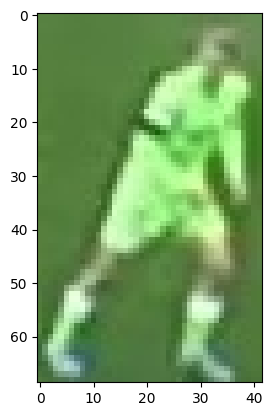

In [4]:
plt.imshow(image)
plt.show()

# Take top half of image

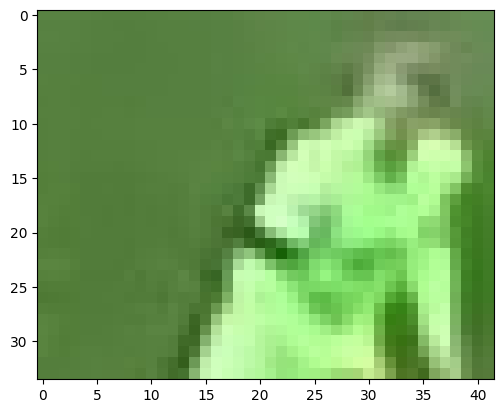

In [5]:
top_half_image = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

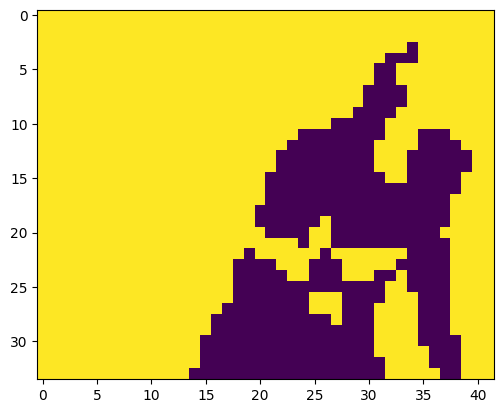

In [9]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

# Perform k-means 
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()



In [10]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [12]:
kmeans.cluster_centers_[player_cluster]

array([170.15665796, 234.31592689, 144.40992167])